<>:56: SyntaxWarning: invalid escape sequence '\m'
<>:69: SyntaxWarning: invalid escape sequence '\m'
<>:56: SyntaxWarning: invalid escape sequence '\m'
<>:69: SyntaxWarning: invalid escape sequence '\m'
C:\Users\joelj\AppData\Local\Temp\ipykernel_89660\1014501504.py:56: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel("Time [$\mu$s]")
C:\Users\joelj\AppData\Local\Temp\ipykernel_89660\1014501504.py:69: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel("Time [$\mu$s]")


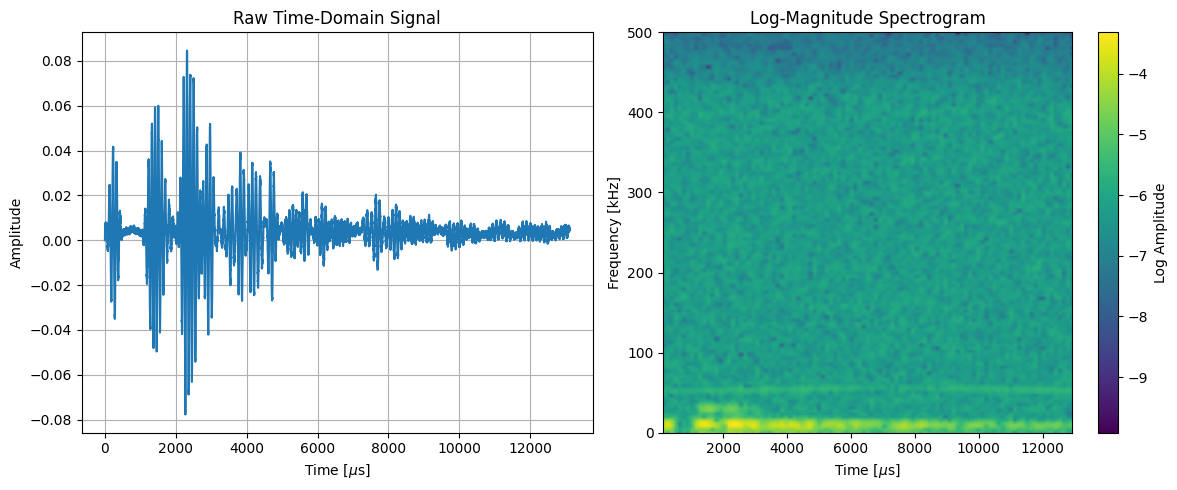

In [9]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram

# =========================
# USER SETTINGS
# =========================
DATA_DIR = r"C:\Users\joelj\CHALMERS\Exchange\Intelligent Systems\Individual Project\Data\SHM-Data"
FILENAME = "D30pc_f100kHz.h5"   # choose any baseline or damage file
PATH_INDEX = 10                # sensor path index to visualize

FS = 1_000_000                # Sampling frequency (Hz)
NPERSEG = 256
NOVERLAP = 128

# =========================
# LOAD SINGLE SIGNAL
# =========================
def load_single_signal(filepath, path_idx):
    with h5py.File(filepath, "r") as f:
        signals = f["pitchcatch/catch"][:]  # shape: (n_paths, n_samples)
    return signals[path_idx]

signal = load_single_signal(
    filepath=f"{DATA_DIR}\\{FILENAME}",
    path_idx=PATH_INDEX
)

# Time axis
t = np.arange(len(signal)) / FS

# =========================
# COMPUTE SPECTROGRAM
# =========================
f, t_spec, Sxx = spectrogram(
    signal,
    fs=FS,
    window="hann",
    nperseg=NPERSEG,
    noverlap=NOVERLAP,
    mode="magnitude"
)

# Log scaling
Sxx_log = np.log10(Sxx + 1e-12)

# =========================
# PLOTTING
# =========================
plt.figure(figsize=(12, 5))

# --- Time-domain signal ---
plt.subplot(1, 2, 1)
plt.plot(t * 1e6, signal)
plt.xlabel("Time [$\mu$s]")
plt.ylabel("Amplitude")
plt.title("Raw Time-Domain Signal")
plt.grid(True)

# --- Spectrogram ---
plt.subplot(1, 2, 2)
plt.pcolormesh(
    t_spec * 1e6,
    f / 1e3,
    Sxx_log,
    shading="gouraud"
)
plt.xlabel("Time [$\mu$s]")
plt.ylabel("Frequency [kHz]")
plt.title("Log-Magnitude Spectrogram")
plt.colorbar(label="Log Amplitude")

plt.tight_layout()
plt.show()
